In [5]:
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import Background2D
from astropy.table import Column
from photutils  import detect_sources
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import source_properties
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks
import numpy as np
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from astropy.io import fits
from random import random
import networkx as nx
import tqdm
import networkx.algorithms.community as nx_comm
import pandas as pd


### Define functions to generate networks with images:

In [79]:
def pk(r,r0):
    return np.exp(-r/r0)

def sep(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def network_generator_cerebellum(path,r0=40,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data,cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
    threshold = median + (3* std)
    tbl = find_peaks(im.data, threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
                    
    return G


def network_generator_galaxy(path,r0=40,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data[0],cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data[0], sigma=3.0)
    threshold = 2.5*median + (5*std)
    tbl = find_peaks(im.data[0], threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
    return G

def network_generator_cortex(path,r0=40,show=False):
    im=fits.open(path)[0]
    if show: plt.imshow(im.data,cmap='Greys_r',origin='lower')
    mean, median, std = sigma_clipped_stats(im.data, sigma=3.0)
    threshold = median + (5* std)
    tbl = find_peaks(im.data, threshold, box_size=10)
    tbl['peak_value'].info.format = '%.8g'
    print(len(tbl))
    N=len(tbl)
    #A=np.zeros([N,N])
    G = nx.Graph()
    for i in tqdm.tqdm(range(N)):
        for j in range(N):
            if i>j:
                r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
                if pk(r,r0)>random():
                    G.add_edge(i,j)
                    
    return G


### Define clasic analysis function which its out put is :
* Average Shortest Path
* Clustering Coefficient
* Modularity
* Diameter
 And a function for entropy

In [57]:
def classical_analysis(G_list):
    avg_shortest_path=[]
    avg_clustering=[]
    modularity = []
    diameter = []
    sigma = []
    for i in tqdm.tqdm(range(len(G_list))):
        avg_shortest_path.append(nx.average_shortest_path_length(G_list[i]))#G0))
        avg_clustering.append(nx.average_clustering(G_list[i]))
        partition = nx.algorithms.community.greedy_modularity_communities(G_list[i])
        modularity.append(nx_comm.modularity(G_list[i],partition))
        diameter.append(nx.diameter(G_list[i]))
        #sigma.append(nx.omega(G_list[i]))
        
    return  [avg_shortest_path, avg_clustering, modularity, diameter, sigma]

def entropy(G_list):
    S = []
    for i in tqdm.tqdm(range(len(G_list))):
        G = G_list[i].copy()
        N = len(G.nodes())
        Ls = np.array(sorted(nx.linalg.spectrum.laplacian_spectrum(G_cortex[i])))
        taus = np.geomspace(10**-2,100/Ls[1])
        s = []
        for tau in taus:
            p = np.exp(-tau*Ls)
            z = np.sum(p)
            p = p/z
            p = np.delete(p,np.where(p<10**-8))
            s.append(-np.sum(p*np.log(p)))
        S.append(s)
    S = np.array(S)/np.log(N)
    return np.mean(S,axis=0), np.var(S,axis=0),taus

### Obtain all the parameters which we need for comparison of these networks:

3992


100%|██████████| 3992/3992 [01:11<00:00, 56.12it/s] 


0  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:06<00:00, 59.86it/s] 


1  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:04<00:00, 61.99it/s] 


2  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:07<00:00, 58.79it/s] 


3  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:07<00:00, 59.05it/s] 


4  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:06<00:00, 60.28it/s] 


5  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 60.92it/s] 


6  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 60.56it/s] 


7  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:08<00:00, 57.96it/s] 


8  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 60.98it/s] 


9  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:58<00:00, 67.80it/s] 


10  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:58<00:00, 68.14it/s] 


11  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:59<00:00, 67.09it/s] 


12  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:59<00:00, 66.89it/s] 


13  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:13<00:00, 54.45it/s] 


14  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:20<00:00, 49.58it/s]


15  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:07<00:00, 59.55it/s] 


16  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:03<00:00, 62.54it/s] 


17  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 60.62it/s] 


18  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 61.25it/s] 


19  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:07<00:00, 59.07it/s] 


20  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:04<00:00, 62.00it/s] 


21  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:07<00:00, 59.29it/s] 


22  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:05<00:00, 61.08it/s] 


23  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:09<00:00, 57.55it/s] 


24  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:00<00:00, 66.33it/s] 


25  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:00<00:00, 66.25it/s] 


26  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:59<00:00, 67.18it/s] 


27  G_Galaxy generated
3992


100%|██████████| 3992/3992 [00:57<00:00, 68.98it/s] 


28  G_Galaxy generated
3992


100%|██████████| 3992/3992 [01:00<00:00, 66.33it/s] 


29  G_Galaxy generated


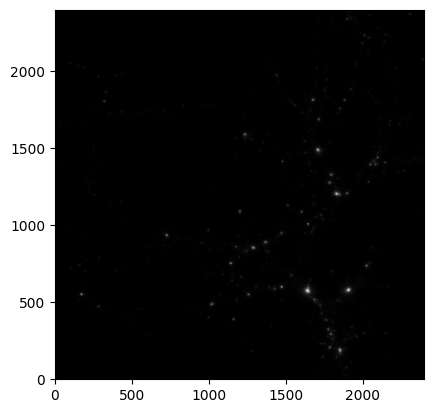

In [97]:
G_Galaxy = []
for i in range(30):
    G = network_generator_galaxy("map_gasDMD_188_1024_X_C.fits",show=True)
    G_Galaxy.append(G)
    print(i,' G_Galaxy generated')

2492


100%|██████████| 2492/2492 [00:38<00:00, 64.05it/s] 


0  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.00it/s]


1  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.19it/s]


2  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 62.33it/s]


3  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:37<00:00, 65.74it/s]


4  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:35<00:00, 69.30it/s] 


5  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.19it/s]


6  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:37<00:00, 65.84it/s]


7  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.34it/s]


8  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.87it/s]


9  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.36it/s]


10  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.20it/s]


11  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:37<00:00, 66.65it/s]


12  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.64it/s] 


13  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 62.63it/s]


14  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.44it/s] 


15  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 65.02it/s]


16  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:39<00:00, 63.71it/s]


17  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:37<00:00, 66.45it/s]


18  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:40<00:00, 62.22it/s]


19  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:40<00:00, 60.81it/s]


20  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:40<00:00, 61.86it/s]


21  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:40<00:00, 61.72it/s]


22  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.12it/s] 


23  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.98it/s]


24  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 65.00it/s]


25  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 63.96it/s]


26  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 64.25it/s]


27  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 65.41it/s] 


28  G_CEREBELLUM generated
2492


100%|██████████| 2492/2492 [00:38<00:00, 65.13it/s]


29  G_CEREBELLUM generated


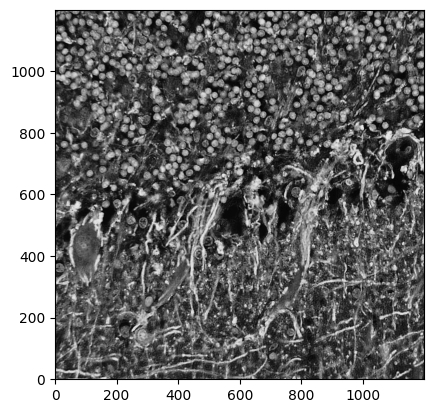

In [64]:
G_CEREBELLUM = []
for i in range(30):
    G = network_generator_cerebellum("CEREBELLUM40.fits",show=True)
    G_CEREBELLUM.append(G)
    print(i,' G_CEREBELLUM generated')

1560


100%|██████████| 1560/1560 [00:06<00:00, 234.82it/s]


1560


100%|██████████| 1560/1560 [00:06<00:00, 224.29it/s]


1560


100%|██████████| 1560/1560 [00:06<00:00, 235.11it/s]


1560


100%|██████████| 1560/1560 [00:06<00:00, 238.58it/s]


1560


100%|██████████| 1560/1560 [00:07<00:00, 209.50it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 177.02it/s]


1560


100%|██████████| 1560/1560 [00:10<00:00, 142.15it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 184.62it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 184.63it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 175.38it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 192.58it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 185.63it/s]


1560


100%|██████████| 1560/1560 [00:07<00:00, 197.73it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 175.78it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 185.97it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 182.99it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 193.15it/s]


1560


100%|██████████| 1560/1560 [00:08<00:00, 175.21it/s]


1560


100%|██████████| 1560/1560 [00:15<00:00, 101.74it/s]


1560


100%|██████████| 1560/1560 [00:15<00:00, 102.69it/s]


1560


100%|██████████| 1560/1560 [00:16<00:00, 94.03it/s]


1560


100%|██████████| 1560/1560 [00:14<00:00, 104.72it/s]


1560


100%|██████████| 1560/1560 [00:15<00:00, 102.15it/s]


1560


100%|██████████| 1560/1560 [00:14<00:00, 105.12it/s]


1560


100%|██████████| 1560/1560 [00:15<00:00, 101.14it/s]


1560


100%|██████████| 1560/1560 [00:15<00:00, 99.32it/s]


1560


100%|██████████| 1560/1560 [00:16<00:00, 94.69it/s] 


1560


100%|██████████| 1560/1560 [00:14<00:00, 104.94it/s]


1560


100%|██████████| 1560/1560 [00:14<00:00, 104.86it/s]


1560


100%|██████████| 1560/1560 [00:14<00:00, 105.48it/s]


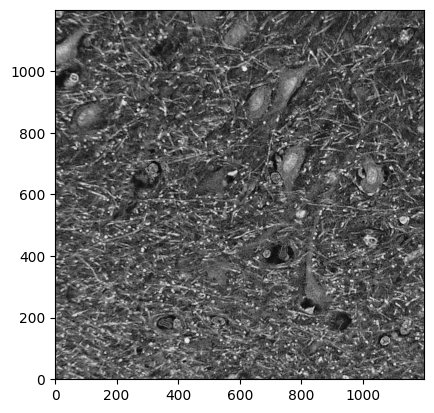

In [53]:
G_cortex = []
for i in range(30):
    G = network_generator("CORTEX40.fits",show=True)
    G_cortex.append(G)
    print(i,'G_cortex generated')

In [92]:
for i in tqdm.tqdm(range(len(G_cortex))):
        Gcc = sorted(nx.connected_components(G_cortex[i]), key=len, reverse=True)
        G_cortex[i] = G_cortex[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:02<00:00, 14.79it/s]


In [93]:
for i in tqdm.tqdm(range(len(G_CEREBELLUM))):
        Gcc = sorted(nx.connected_components(G_CEREBELLUM[i]), key=len, reverse=True)
        G_CEREBELLUM[i] = G_CEREBELLUM[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:05<00:00,  5.48it/s]


In [98]:
for i in tqdm.tqdm(range(len(G_Galaxy))):
        Gcc = sorted(nx.connected_components(G_Galaxy[i]), key=len, reverse=True)
        G_Galaxy[i] = G_Galaxy[i].subgraph(Gcc[0]).copy()

100%|██████████| 30/30 [00:05<00:00,  5.64it/s]


In [99]:
results_cortex = classical_analysis(G_cortex)    

100%|██████████| 30/30 [05:17<00:00, 10.59s/it]


In [ ]:
results_cerebellum = classical_analysis(G_CEREBELLUM)    

 17%|█▋        | 5/30 [02:51<15:03, 36.16s/it]

In [ ]:
results_galaxy = classical_analysis(G_Galaxy)    

In [ ]:
plt.figure(figsize=[17,4],layout='tight')
plt.suptitle('Statistical Comparison of Ensembles',fontsize=30)

colors = {'cortex': 'red', 'galaxy':'blue','cerebellum':'green'}

plt.subplot(1,4,1)
plt.title('Average Shortest Path',fontsize=20)
plt.hist(results_cortex[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cerebellum'])
plt.hist(results_galaxy[0],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['galaxy'])
#plt.hist(results_cerebelum[0])
#plt.hist(results_darkgalaxy[0])
#plt.hist(results_galaxy[0])

plt.subplot(1,4,2)
plt.title('Clustering Coefficient',fontsize=20)
plt.hist(results_cortex[1],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[1],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cerebellum'])
plt.hist(results_galaxy[1],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['galaxy'])

plt.subplot(1,4,3)
plt.title('Modularity',fontsize=20)
plt.hist(results_cortex[2],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[2],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cerebellum'])
plt.hist(results_galaxy[2],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['galaxy'])

plt.subplot(1,4,4)
plt.title('Diameter',fontsize=20)
plt.hist(results_cortex[3],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])
plt.hist(results_cerebellum[3],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cerebellum'])
plt.hist(results_galaxy[3],bins=5, density = True, alpha=0.5,edgecolor='black',label='Cortex',color=colors['galaxy']1

#plt.subplot(1,5,5)
#plt.title('Small-Worldness',fontsize=20)
#plt.hist(results_cortex[0],bins=10, alpha=0.5,edgecolor='black',label='Cortex',color=colors['cortex'])


plt.legend()

In [90]:
entropy_cortex, entropy_var_cortex, taus_cortex = entropy(G_cortex)

100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


In [ ]:
entropy_cerebellum, entropy_var_cerebellum, taus_cerebellum= entropy(G_CEREBELLUM)

In [ ]:
entropy_galaxy, entropy_var_galaxy, taus_galaxy = entropy(G_Galaxy)

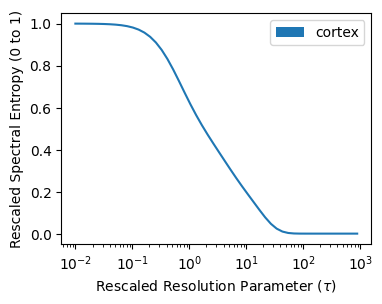

In [108]:
plt.figure(figsize=[4,3])
#cortex
y = entropy_cortex; error=entropy_var_cortex ; x = taus_cortex
plt.plot(x, y)
plt.fill_between(x, y-error, y+error,label='cortex')
#cerebellum
y = entropy_cerebellum; error=entropy_var_cerebellum ; x = taus_cerebellum
plt.plot(x, y)
plt.fill_between(x, y-error, y+error,label='cerebellum')
y = entropy_cortex; error=entropy_var_cortex ; x = taus
#cosmic
plt.plot(x, y)
plt.fill_between(x, y-error, y+error,label='cosmic')
plt.ylabel('Rescaled Spectral Entropy (0 to 1)')
plt.xlabel('Rescaled Resolution Parameter ' + r'$(\tau)$')
plt.xscale('log')

plt.legend()

In [105]:
df = pd.DataFrame({'entropy_cortex': entropy_cortex,'entropy_var_cortex': entropy_var_cortex,'taus': taus})
df.to_csv("entropy_cortex.csv")

In [125]:
df = pd.DataFrame({'cortex':results_cortex})
df.to_csv("clasical_cortex.csv")
#(df.iloc[2])[0]

In [109]:
df = pd.DataFrame({'entropy_cortex': entropy_cortex,'entropy_var_cortex': entropy_var_cortex,'taus': taus})

[[5.629059588854264,
  5.676528131268535,
  5.689874767489446,
  5.6972664923274285,
  5.6490961294295765,
  5.67709708257408,
  5.613516613542963,
  5.592974448093573,
  5.72451630509612,
  5.566203225353161,
  5.679811163794631,
  5.627951020542425,
  5.632936022089153,
  5.655026824074143,
  5.581961874444713,
  5.677905791023174,
  5.847051131551184,
  5.58750941120193,
  5.73058630010167,
  5.620630009159842,
  5.699667656853022,
  5.750871638879475,
  5.588890050812665,
  5.694865224543102,
  5.62292450426786,
  5.6630613577563045,
  5.738866137070114,
  5.661842578724224,
  5.624534836624538,
  5.71956711238302],
 [0.1625882957517039,
  0.17052025780037977,
  0.1700953570369033,
  0.16532303222685668,
  0.16525532396222606,
  0.16722713396858757,
  0.1683588075812123,
  0.16914643513998381,
  0.1659376821480835,
  0.15947583634284207,
  0.1632488783702826,
  0.16963262858042796,
  0.1684375551609562,
  0.1662265452573036,
  0.16173913109032886,
  0.1651464570550055,
  0.16629090

In [97]:
#results_cortex
results_entropy_cortex = np.array([entropy_cortex,entropy_var_cortex,taus])
np.save(results_entropy_cortex)

array([[9.99591624e-01, 9.99472271e-01, 9.99282782e-01, 9.98982455e-01,
        9.98507524e-01, 9.97758732e-01, 9.96582938e-01, 9.94746750e-01,
        9.91900577e-01, 9.87533445e-01, 9.80924082e-01, 9.71103783e-01,
        9.56861444e-01, 9.36834433e-01, 9.09725694e-01, 8.74651571e-01,
        8.31557905e-01, 7.81557718e-01, 7.26959763e-01, 6.70787381e-01,
        6.15890637e-01, 5.64136993e-01, 5.16100285e-01, 4.71257024e-01,
        4.28480484e-01, 3.86624648e-01, 3.45018902e-01, 3.03724469e-01,
        2.63378626e-01, 2.24542398e-01, 1.87016110e-01, 1.49955038e-01,
        1.12984263e-01, 7.74787185e-02, 4.66462247e-02, 2.37454409e-02,
        9.81276723e-03, 3.13446392e-03, 7.26421079e-04, 1.12438832e-04,
        1.04427131e-05, 4.99173233e-07, 1.38512818e-09, 3.11992559e-12,
        4.80836247e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.99120075e-08, 3.00342899e-08, 3.02889643e-08, 3.08688940e-08,
        3.23067066e-08,

In [52]:
nx.linalg.spectrum.laplacian_spectrum(G_cortex[0])

array([2.84217035e-14, 1.12999162e-01, 1.38981863e-01, ...,
       2.66046039e+01, 2.68530404e+01, 2.85202781e+01])

In [ ]:

    for i in range(N):
        for j in range(N):
            r=sep(tbl['x_peak'][i],tbl['y_peak'][i],tbl['x_peak'][j],tbl['y_peak'][j])
            A[i][j]=pk(r,r0)
            if i>j:
                if pk(r,r0)>random():
                    A[i][j]=1
                    A[j][i]=1
                else:
                    A[i][j]=0
                    A[j][i]=0
            else:
                A[i][j]=0


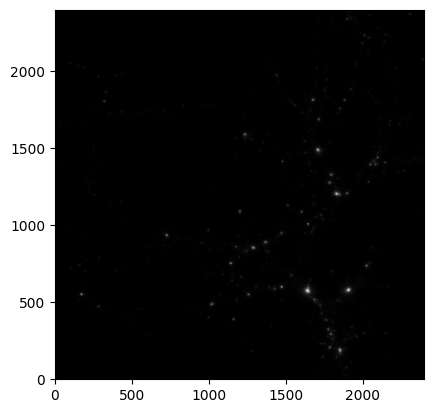

In [2]:
#load the image
im=fits.open('map_gasDMD_188_1024_X_C.fits')[0]

plt.imshow(im.data[0],cmap='Greys_r',origin='lower')

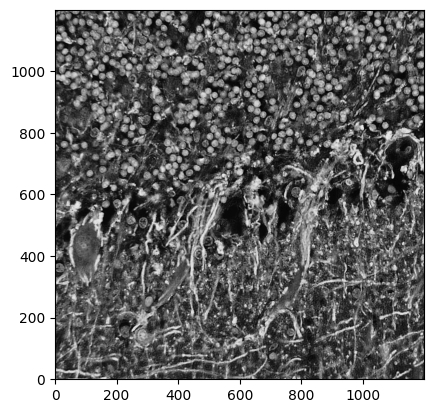

In [7]:
im=fits.open('CEREBELLUM40.fits')[0]
plt.imshow(im_Cel.data,cmap='Greys_r',origin='lower')

## Finding peaks

In [16]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks

mean, median, std = sigma_clipped_stats(im.data[0], sigma=3.0)
threshold = 5*median + (15* std)
tbl = find_peaks(im.data[0], threshold, box_size=10)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
#print(tbl[:10])  # print only the first 10 peaks
# tbl.write('peaks_cos.csv' , format='ascii', overwrite=True)

In [18]:
len(tbl)

2301

In [12]:
len(tbl)


2301

### Source detection

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  


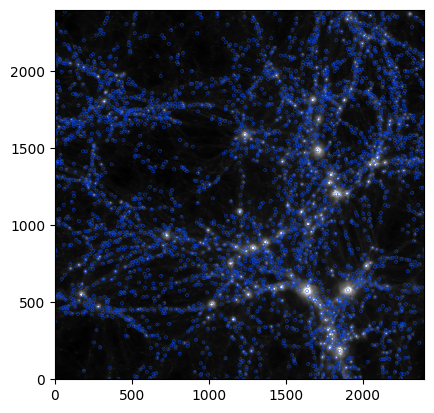

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=10.)
norm = simple_norm(im.data[0], 'sqrt', percent=99.9)
plt.imshow(im.data[0], cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
apertures.plot(color='#0547f9', lw=0.3)
plt.xlim(0, im.data[0].shape[1]-1)
plt.ylim(0, im.data[0].shape[0]-1)

plt.savefig('Peak finding_cos.pdf',dpi=1000,overwrite=True)

finding the network with probability pk(r,r0) by distance

In [23]:
from astropy.io import ascii
from astropy.io import fits
import numpy as np
from random import random
import networkx as nx
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

r0=40

def pk(r,r0):
    return np.exp(-r/r0)

def sep(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
data=ascii.read('peaks_Cel.csv')
N=len(data)
A=np.zeros([N,N])

for i in range(N):
    for j in range(N):
        r=sep(data['x_peak'][i],data['y_peak'][i],data['x_peak'][j],data['y_peak'][j])
        A[i][j]=pk(r,r0)
        if i!=j:
            if pk(r,r0)>random():
                A[i][j]=1
            else:
                A[i][j]=0
        else:
            A[i][j]=0

Text(0.5, 1.0, 'Probability Dist pk')

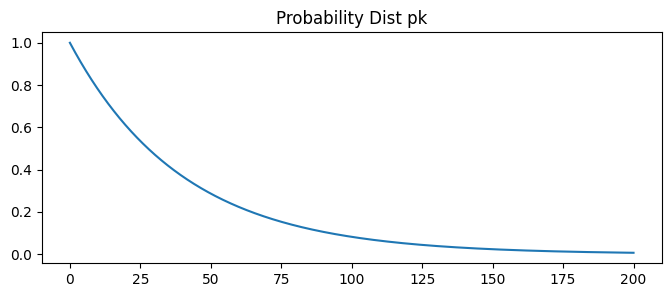

In [164]:
x=np.arange(0,200,0.001)
plt.figure(figsize=(8,3))
plt.plot(x,pk(x,40))
plt.title('Probability Dist pk')

* Plot the network on the image and save adjacency matrix

C:\Users\rosha\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  if sys.path[0] == "":


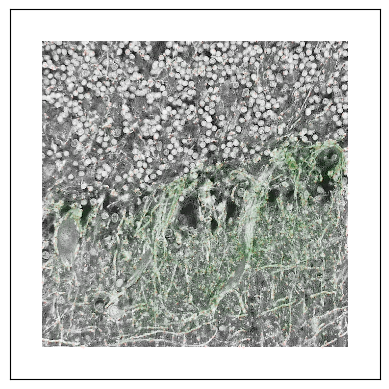

In [27]:

pos={}
for i in range(len(data)):
    pos[i]=data['x_peak'][i],data['y_peak'][i]
    
G = nx.from_numpy_array(A)
im=fits.open('CEREBELLUM40.fits')[0]
norm = simple_norm(im.data, 'sqrt', percent=99.9)
plt.imshow(im.data, cmap='Greys_r', origin='lower', norm=norm,interpolation='nearest')
nx.draw_networkx_nodes(G = G, pos = pos,node_color = 'r', alpha = 0.2, node_size = 0.1)
nx.draw_networkx_edges(G = G, pos = pos, edge_color='g',width=0.01, arrows = False)

plt.savefig('Graph(r=40).pdf',dpi=1000,overwrite=True)

# save the matrix

hdu=fits.PrimaryHDU(A)
hdul = fits.HDUList([hdu])
#hdul.writeto('Adj_Matrix_Peaks_r=40.fits',overwrite=True)

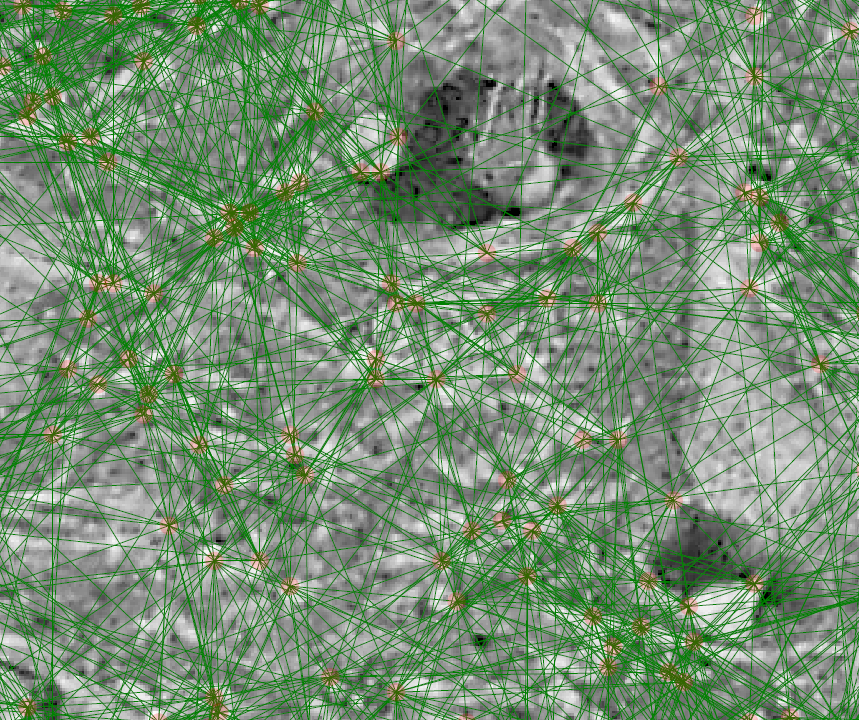

In [28]:
from IPython.display import Image

fig = Image(filename=('green.png'),width=400)
fig